# Exploring Questions posted on Data Science Stack Exchange
Data Science Stack Exchange (DSSE) is a website where users can ask questions related to Data Science. These questions are answered by other users on the site. You can filter questions relating to a specific topic by selecting one of the tags. For example, selecting the 'python' tag will direct the user to questions regarding Python. Users can also explore other users, companies, and unanswered questions on the website.

Using the Stack Exchange Data Explorer (SEDE), we can explore different data. 
For example, Running the SQL query:

SELECT TOP 10 *
  
    FROM tags
 
    ORDER BY Count DESC;
 
We can see that tags with machine learning are posted the most, followed by python tags.

We can explore the tables on the side, where the Posts table has a lot of relevant information such as the score, the tags used, how many favourites a post got and more.

For this project, we will analyze questions from the most recent full year which was 2022. This query was ran to get the csv file:

SELECT

  Id,
  CreationDate,
  Score,
  ViewCount,
  Tags,
  AnswerCount,
  FavoriteCount
  
  FROM posts
  
  WHERE PostTypeId=1 and YEAR(CreationDate)=2022;

## Importing dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
questions = pd.read_csv('2022_questions.csv',parse_dates=['CreationDate'])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             4644 non-null   int64         
 1   CreationDate   4644 non-null   datetime64[ns]
 2   Score          4644 non-null   int64         
 3   ViewCount      4644 non-null   int64         
 4   Tags           4644 non-null   object        
 5   AnswerCount    4644 non-null   int64         
 6   FavoriteCount  18 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 254.1+ KB


We see that, there are only 18 values entered for FavoriteCount, Let's see what these values are first

## Cleaning data

In [4]:
questions['FavoriteCount'].value_counts()

0.0    17
1.0     1
Name: FavoriteCount, dtype: int64

We see that most of the valid amount of favourites are just 0, while only one of them has 1 like. This column does not have that much data, so it would be better to just drop it.

In [5]:
questions.drop('FavoriteCount',inplace=True,axis=1)

In [6]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount
0,106600,2022-01-01 00:20:53,4,2299,<python><keras><tensorflow><regression>,1
1,106602,2022-01-01 03:32:55,3,134,<deep-learning><word-embeddings><deepmind>,1
2,106603,2022-01-01 06:18:52,0,52,<logistic-regression><sigmoid>,1
3,106607,2022-01-01 15:07:25,1,21,<machine-learning><python><pandas><statistics>...,0
4,106609,2022-01-01 15:40:23,0,27,<nlp><data-science-model><bert>,0


In [7]:
questions.fillna(0,inplace=True)

Let's now clean the tags column, seperating by commas

In [8]:
questions['Tags'] = questions['Tags'].str.replace("><",", ").str.replace("<","").str.replace(">","").str.replace("-"," ")

In [9]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount
0,106600,2022-01-01 00:20:53,4,2299,"python, keras, tensorflow, regression",1
1,106602,2022-01-01 03:32:55,3,134,"deep learning, word embeddings, deepmind",1
2,106603,2022-01-01 06:18:52,0,52,"logistic regression, sigmoid",1
3,106607,2022-01-01 15:07:25,1,21,"machine learning, python, pandas, statistics, ...",0
4,106609,2022-01-01 15:40:23,0,27,"nlp, data science model, bert",0


## Most Popular tags
Now, Let's investigate how many times a tag was used and viewed

In [10]:
tag_dict = {}
for tags in questions['Tags']:
    tags_list = tags.split(", ")
    for tag in tags_list:
        if tag in tag_dict:
            tag_dict[tag] += 1
        else:
            tag_dict[tag] = 1
        
sort_dict = dict(sorted(tag_dict.items(), key=lambda x: x[1], reverse=True))

tags_used = pd.DataFrame.from_dict(sort_dict, orient='index', columns=['count'])
tags_used.head(15)

,count
machine learning,1279
python,778
deep learning,654
nlp,398
classification,385
neural network,366
time series,309
tensorflow,268
scikit learn,266
keras,261


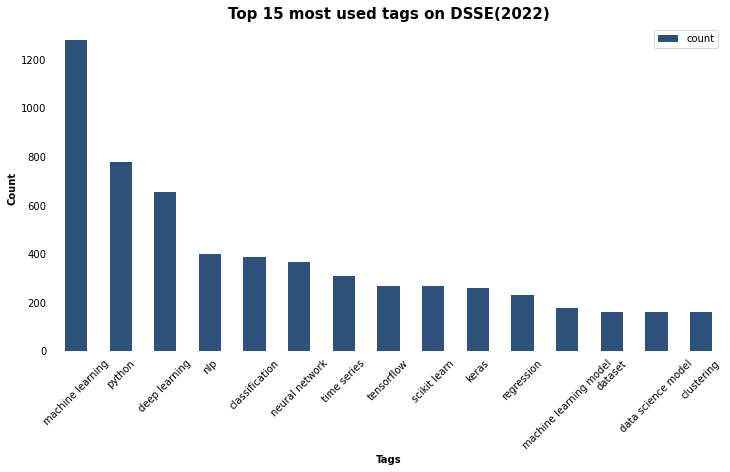

In [11]:
ax = tags_used.head(15).plot(kind='bar',figsize=(12,6),color='#2E517B')
ax.set_title('Top 15 most used tags on DSSE(2022)',size=15,weight='bold')
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.tick_params(left=False, bottom=False)
plt.xticks(rotation=45)
plt.xlabel('Tags',weight='bold')
plt.ylabel('Count',weight='bold')
plt.show()

We can see that machine learning is the most used tag, followed by python which does make sense since we have already figured that out in the beginning.

In [12]:
tag_views = {}
for index,rows in questions.iterrows():
    tags_list = rows['Tags'].split(",")
    for tag in tags_list:
        if tag in tag_views:
            tag_views[tag] += rows['ViewCount']
        else:
            tag_views[tag] = rows['ViewCount']

sort_views = dict(sorted(tag_views.items(), key=lambda x: x[1], reverse=True))
            
view_tags = pd.DataFrame.from_dict(sort_views, orient='index', columns=['count'])
view_tags.head(15)

,count
machine learning,255499
python,157443
deep learning,87201
neural network,60564
deep learning,59771
tensorflow,58774
python,56525
classification,51386
pandas,48447
machine learning model,47635


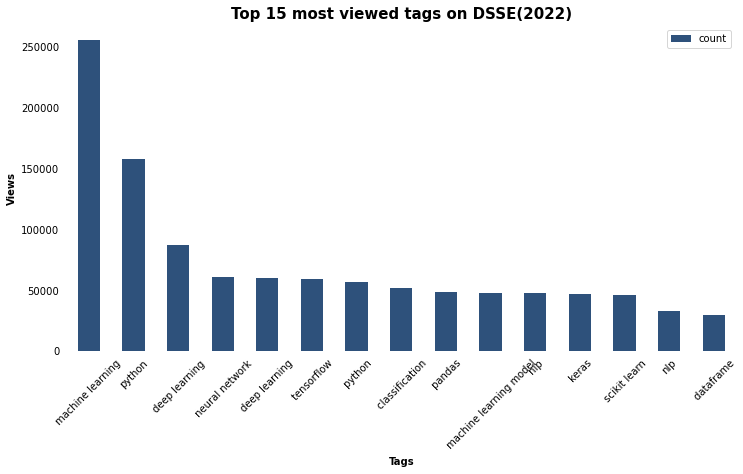

In [13]:
ax = view_tags.head(15).plot(kind='bar',figsize=(12,6),color='#2E517B')
ax.set_title('Top 15 most viewed tags on DSSE(2022)',size=15,weight='bold')
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.tick_params(left=False, bottom=False)
plt.xticks(rotation=45)
plt.xlabel('Tags',weight='bold')
plt.ylabel('Views',weight='bold')
plt.show()

As We can see, Machine learning once again is the most viewed tag, followed by Python.

## What tags are in one datafram but not the other
Let's check what tags are in most_viewed but not in most_used and vice versa (these two dataframes will represent the top 20 values for the most viewed and used).

In [14]:
most_viewed = view_tags.head(20)
most_used = tags_used.head(20)

used = in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
used

,count_x,count_y
machine learning,1279,255499.0
python,778,157443.0
deep learning,654,59771.0
nlp,398,32266.0
classification,385,NaN
neural network,366,NaN
time series,309,NaN
tensorflow,268,NaN
scikit learn,266,24216.0
keras,261,21818.0


In [15]:
viewed = in_used = pd.merge(most_viewed, most_used, how="left", left_index=True, right_index=True)
viewed

,count_x,count_y
machine learning,255499,1279.0
python,157443,778.0
deep learning,87201,NaN
neural network,60564,NaN
deep learning,59771,654.0
tensorflow,58774,NaN
python,56525,NaN
classification,51386,NaN
pandas,48447,NaN
machine learning model,47635,NaN


As we can see for both dataframes, more than half of the right column is missing. This explains that just because a tag is used a lot does not mean it will be viewed a lot and vice versa.

Most of the highest viewed tags are related in terms of machine learning. Whether it be about machine learning, machine learning libraries, or Python, they are all related to one another.

## Is Deep learning just a fad?
Let's find out if the interest of deep learning increased over time or decreased.

In [16]:
all_questions = pd.read_csv("QueryResults.csv",parse_dates=['CreationDate'])

In [17]:
all_questions.head()

,Id,CreationDate,Tags
0,31914,2018-05-21 09:42:52,<python><scikit-learn><svm><hyperparameter>
1,31916,2018-05-21 10:13:25,<machine-learning><python><predictive-modeling...
2,31922,2018-05-21 12:02:44,<optimization><bayesian>
3,31923,2018-05-21 12:28:51,<python><deep-learning><keras><lstm>
4,31925,2018-05-21 12:43:56,<python><nlp><nltk>


In [18]:
## Fixing the Tags column
all_questions['Tags'] = all_questions['Tags'].str.replace("><",", ").str.replace("<","").str.replace(">","").str.replace("-"," ")
all_questions.head()

,Id,CreationDate,Tags
0,31914,2018-05-21 09:42:52,"python, scikit learn, svm, hyperparameter"
1,31916,2018-05-21 10:13:25,"machine learning, python, predictive modeling,..."
2,31922,2018-05-21 12:02:44,"optimization, bayesian"
3,31923,2018-05-21 12:28:51,"python, deep learning, keras, lstm"
4,31925,2018-05-21 12:43:56,"python, nlp, nltk"


The goal is to find the amount of deep learning tags per time period, the total amount of questions per time period, and the amount of deep learning questions there are relative to the time period. The time period will be yearly.

In [19]:
## Create DataFrame regarding total questions per year
all_questions['Year'] = all_questions['CreationDate'].dt.to_period('Y')
total_q = all_questions.groupby('Year').size()
total_q.head(10)

Year
2014     559
2015    1161
2016    2113
2017    2916
2018    5326
2019    6749
2020    6132
2021    4716
2022    4644
2023    1777
Freq: A-DEC, dtype: int64

In [26]:
## Create DataFrame regarding total questions of deep learning per year
all_deep_learn = all_questions.copy()

for index,tags in enumerate(all_deep_learn['Tags']):
    tag_list2 = tags.split(", ")
    if 'deep learning' not in tag_list2:
        all_deep_learn = all_deep_learn.drop(index,axis=0)

In [29]:
total_deep = all_deep_learn.groupby('Year').size()
total_deep.head(10)

Year
2014      8
2015     30
2016    158
2017    422
2018    896
2019    895
2020    842
2021    683
2022    654
2023    213
Freq: A-DEC, dtype: int64

In [38]:
## Create DataFrame to represent the percentage of deep learning related questions per time period
proportion = round((total_deep / total_q)*100,2)
proportion.head(10)

Year
2014     1.43
2015     2.58
2016     7.48
2017    14.47
2018    16.82
2019    13.26
2020    13.73
2021    14.48
2022    14.08
2023    11.99
Freq: A-DEC, dtype: float64

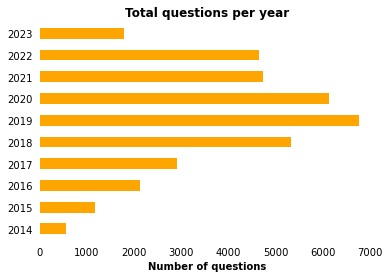

In [73]:
total_q.plot.barh(color='orange')
ax = plt.gca()
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.tick_params(left=False, bottom=False)
plt.title('Total questions per year',weight='bold')
plt.xlabel('Number of questions',weight='bold')
plt.ylabel('')
plt.show()

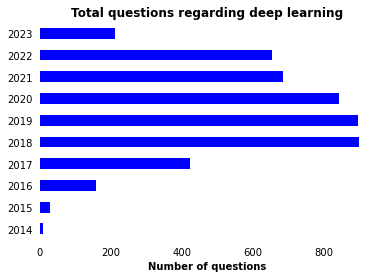

In [74]:
total_deep.plot.barh(color='blue')
ax = plt.gca()
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.tick_params(left=False, bottom=False)
plt.title('Total questions regarding deep learning',weight='bold')
plt.xlabel('Number of questions',weight='bold')
plt.ylabel('')
plt.show()

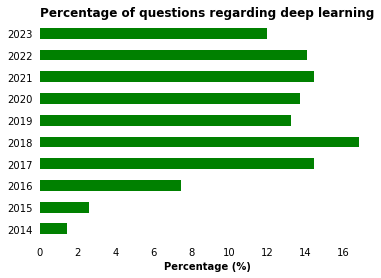

In [76]:
proportion.plot.barh(color='green')
ax = plt.gca()
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.tick_params(left=False, bottom=False)
plt.title('Percentage of questions regarding deep learning',weight='bold')
plt.xlabel('Percentage (%)',weight='bold')
plt.ylabel('')
plt.show()

We can see that the questions regarding deep learning have definetly declined after 2020, but are still relatively high compared to 2017 and prior.